# 모듈 불러오기

#### 기본

In [251]:
import numpy as np
import pandas as pd
import joblib

In [252]:
# !conda install numpy 
# !conda install pandas
# !conda install scikit-learn
# !conda install scipy
# !conda install tensorflow
# !conda install matplotlib
# !conda install seaborn

# !pip install xgboost
# !pip install lightgbm
# !pip install catboost
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension
# !pip install hyperopt
# !pip install -U imbalanced-learn
# !pip install missingno

#### 전처리

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from sklearn import impute
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer

#### 리샘플링

In [254]:
from imblearn.over_sampling import (
    RandomOverSampler, 
    ADASYN, 
    SMOTE
)
from imblearn.under_sampling import (
    RandomUnderSampler, 
    TomekLinks, 
    CondensedNearestNeighbour, 
    OneSidedSelection, 
    EditedNearestNeighbours, 
    NeighbourhoodCleaningRule
)

#### 분석

In [255]:
from scipy.stats import skew, kurtosis
from scipy.stats import ttest_ind, f_oneway, pearsonr

#### 회귀

In [256]:
from sklearn.linear_model import LinearRegression as RL
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGBR
from lightgbm import LGBMRegressor as LGBMR
from catboost import CatBoostRegressor as CBR

from lightgbm import plot_importance as lgbm_plot_importance
from xgboost import plot_importance as xgb_plot_importance
from catboost import Pool

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

#### 분류

In [257]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGBC
from lightgbm import LGBMClassifier as LGBMC
from catboost import CatBoostClassifier as CBC

from sklearn.metrics import confusion_matrix as cmatrix
from sklearn.metrics import classification_report as creport
from sklearn.metrics import recall_score as recall
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

#### 교차검증

In [258]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from catboost import cv
import hyperopt

from sklearn.model_selection import (
    StratifiedKFold, # 분류
    KFold, # 회귀
    # GroupKFold, 
    # RepeatedKFold, 
    # StratifiedGroupKFold, 
    # RepeatedStratifiedKFold
)

#### 시각화

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  

import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

# 건물 데이터 로드

In [260]:
# folder_name = '건물'
# file_name = 'GIS건물통합정보_fix'

# df_all_origin = pd.read_excel(f'../../data/{folder_name}/{file_name}.xlsx', engine='openpyxl')

In [261]:
folder_name = '건물'
file_name = 'GIS건물통합정보_강서구'

bd_df_origin = pd.read_excel(f'../../data/{folder_name}/{file_name}.xlsx', engine='openpyxl')

In [262]:
bd_df = bd_df_origin.copy()

# 면적 데이터 로드

In [263]:
folder_name = '건물'
file_name = '강서구 행정동별 면적'

area_df_origin = pd.read_csv(f'../../data/{folder_name}/{file_name}.csv')

In [264]:
area_df = area_df_origin.copy()

# 데이터 이해

In [265]:
bd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28900 entries, 0 to 28899
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   법정동명    28900 non-null  object        
 1   지번      28900 non-null  object        
 2   용도명     28900 non-null  object        
 3   구조명     28900 non-null  object        
 4   면적      28900 non-null  float64       
 5   사용승인일자  28900 non-null  datetime64[ns]
 6   연면적     28900 non-null  float64       
 7   대지면적    28900 non-null  float64       
 8   높이      28900 non-null  float64       
 9   건폐율     28900 non-null  float64       
 10  용적율     28900 non-null  float64       
 11  사용승인년도  28900 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 2.6+ MB


In [266]:
bd_df.isna().sum()

법정동명      0
지번        0
용도명       0
구조명       0
면적        0
사용승인일자    0
연면적       0
대지면적      0
높이        0
건폐율       0
용적율       0
사용승인년도    0
dtype: int64

In [267]:
area_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정동     20 non-null     object 
 1   면적 (㎢)  20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [268]:
area_df.isna().sum()

행정동       0
면적 (㎢)    0
dtype: int64

# 시각화 세팅, 함수

In [269]:
figure_size = (18, 10)
marker = 'o'
color = 'black'
title_size = 15

In [270]:
def linegraph(df, title='제목 입력하기', rotation=0, path='./img/인구'):
    plt.plot(df, marker=marker, color=color)
    plt.xticks(rotation=rotation)
    plt.title(title, size=title_size)
    plt.tight_layout()
    plt.savefig(f'{path}/{title}.png')
    plt.show()

# 강서구 건물 밀도

In [275]:
area_df.value_counts()

행정동   면적 (㎢)
가양1동  4.70      1
가양2동  1.00      1
화곡8동  0.53      1
화곡6동  1.11      1
화곡4동  0.82      1
화곡3동  0.53      1
화곡2동  0.45      1
화곡1동  1.12      1
우장산동  1.36      1
염창동   1.74      1
방화3동  2.55      1
방화2동  6.41      1
방화1동  1.48      1
발산1동  2.94      1
등촌3동  0.79      1
등촌2동  0.92      1
등촌1동  0.64      1
공항동   10.87     1
가양3동  0.50      1
화곡본동  0.98      1
dtype: int64

In [284]:
area_data = {'염창동': 1.74, # 한강
'마곡동': 4.70, # 한강
'가양동': 1.00 + 0.99, # 한강
'화곡동': np.round(1.11 + 1.12 + 0.47 + 0.51 + 0.82 + 1.11 + 0.53, 2),
'등촌동': 0.59 + 0.92 + 0.79,
'내발산동': 1.36,
'외발산동': 2.9	,
'방화동': 4.74, # 한강
'개화동': 4.79, # 한강
}

In [285]:
area_data

{'염창동': 1.74,
 '마곡동': 4.7,
 '가양동': 1.99,
 '화곡동': 5.67,
 '등촌동': 2.3,
 '내발산동': 1.36,
 '외발산동': 2.9,
 '방화동': 4.74,
 '개화동': 4.79}

In [316]:
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [319]:
area_df = pd.DataFrame({'면적(㎢)': area_data.values(), '법정동명': area_data.keys()})

In [320]:
area_df

,면적(㎢),법정동명
0,1.74,염창동
1,4.70,마곡동
2,1.99,가양동
3,5.67,화곡동
4,2.30,등촌동
5,1.36,내발산동
6,2.90,외발산동
7,4.74,방화동
8,4.79,개화동


In [276]:
set(bd_df['법정동명'])

{'가양동',
 '개화동',
 '공항동',
 '과해동',
 '내발산동',
 '등촌동',
 '마곡동',
 '방화동',
 '염창동',
 '오곡동',
 '오쇠동',
 '외발산동',
 '화곡동'}

In [292]:
bd_df.head(1)

,법정동명,지번,용도명,구조명,면적,사용승인일자,연면적,대지면적,높이,건폐율,용적율,사용승인년도
0,염창동,5-17,단독주택,블록구조,29.76,1900-01-01,29.76,0.0,0.0,0.0,0.0,1900


In [295]:
bd_area_df = bd_df.groupby('법정동명', as_index=False)['면적'].sum()

In [311]:
bd_area_df

,법정동명,면적
0,가양동,6.106151e+05
1,개화동,1.038572e+05
2,공항동,4.208430e+05
3,과해동,2.271182e+04
4,내발산동,3.192268e+05
5,등촌동,8.367990e+05
6,마곡동,7.372986e+04
7,방화동,7.692420e+05
8,염창동,2.633516e+05
9,오곡동,3.396865e+04


In [322]:
merge_df = pd.merge(bd_area_df, area_df, how='inner', on='법정동명')
merge_df

,법정동명,면적,면적(㎢)
0,가양동,6.106151e+05,1.99
1,개화동,1.038572e+05,4.79
2,내발산동,3.192268e+05,1.36
3,등촌동,8.367990e+05,2.30
4,마곡동,7.372986e+04,4.70
5,방화동,7.692420e+05,4.74
6,염창동,2.633516e+05,1.74
7,외발산동,1.168695e+05,2.90
8,화곡동,2.429843e+06,5.67


In [324]:
np.round(merge_df['면적'],1) * 0.000001 / merge_df['면적(㎢)'] * 100

0    30.684176
1     2.168209
2    23.472559
3    36.382565
4     1.568721
5    16.228734
6    15.135149
7     4.029983
8    42.854381
dtype: float64

In [325]:
merge_df['건물면적비율'] = np.round(merge_df['면적'],1) * 0.000001 / merge_df['면적(㎢)'] * 100

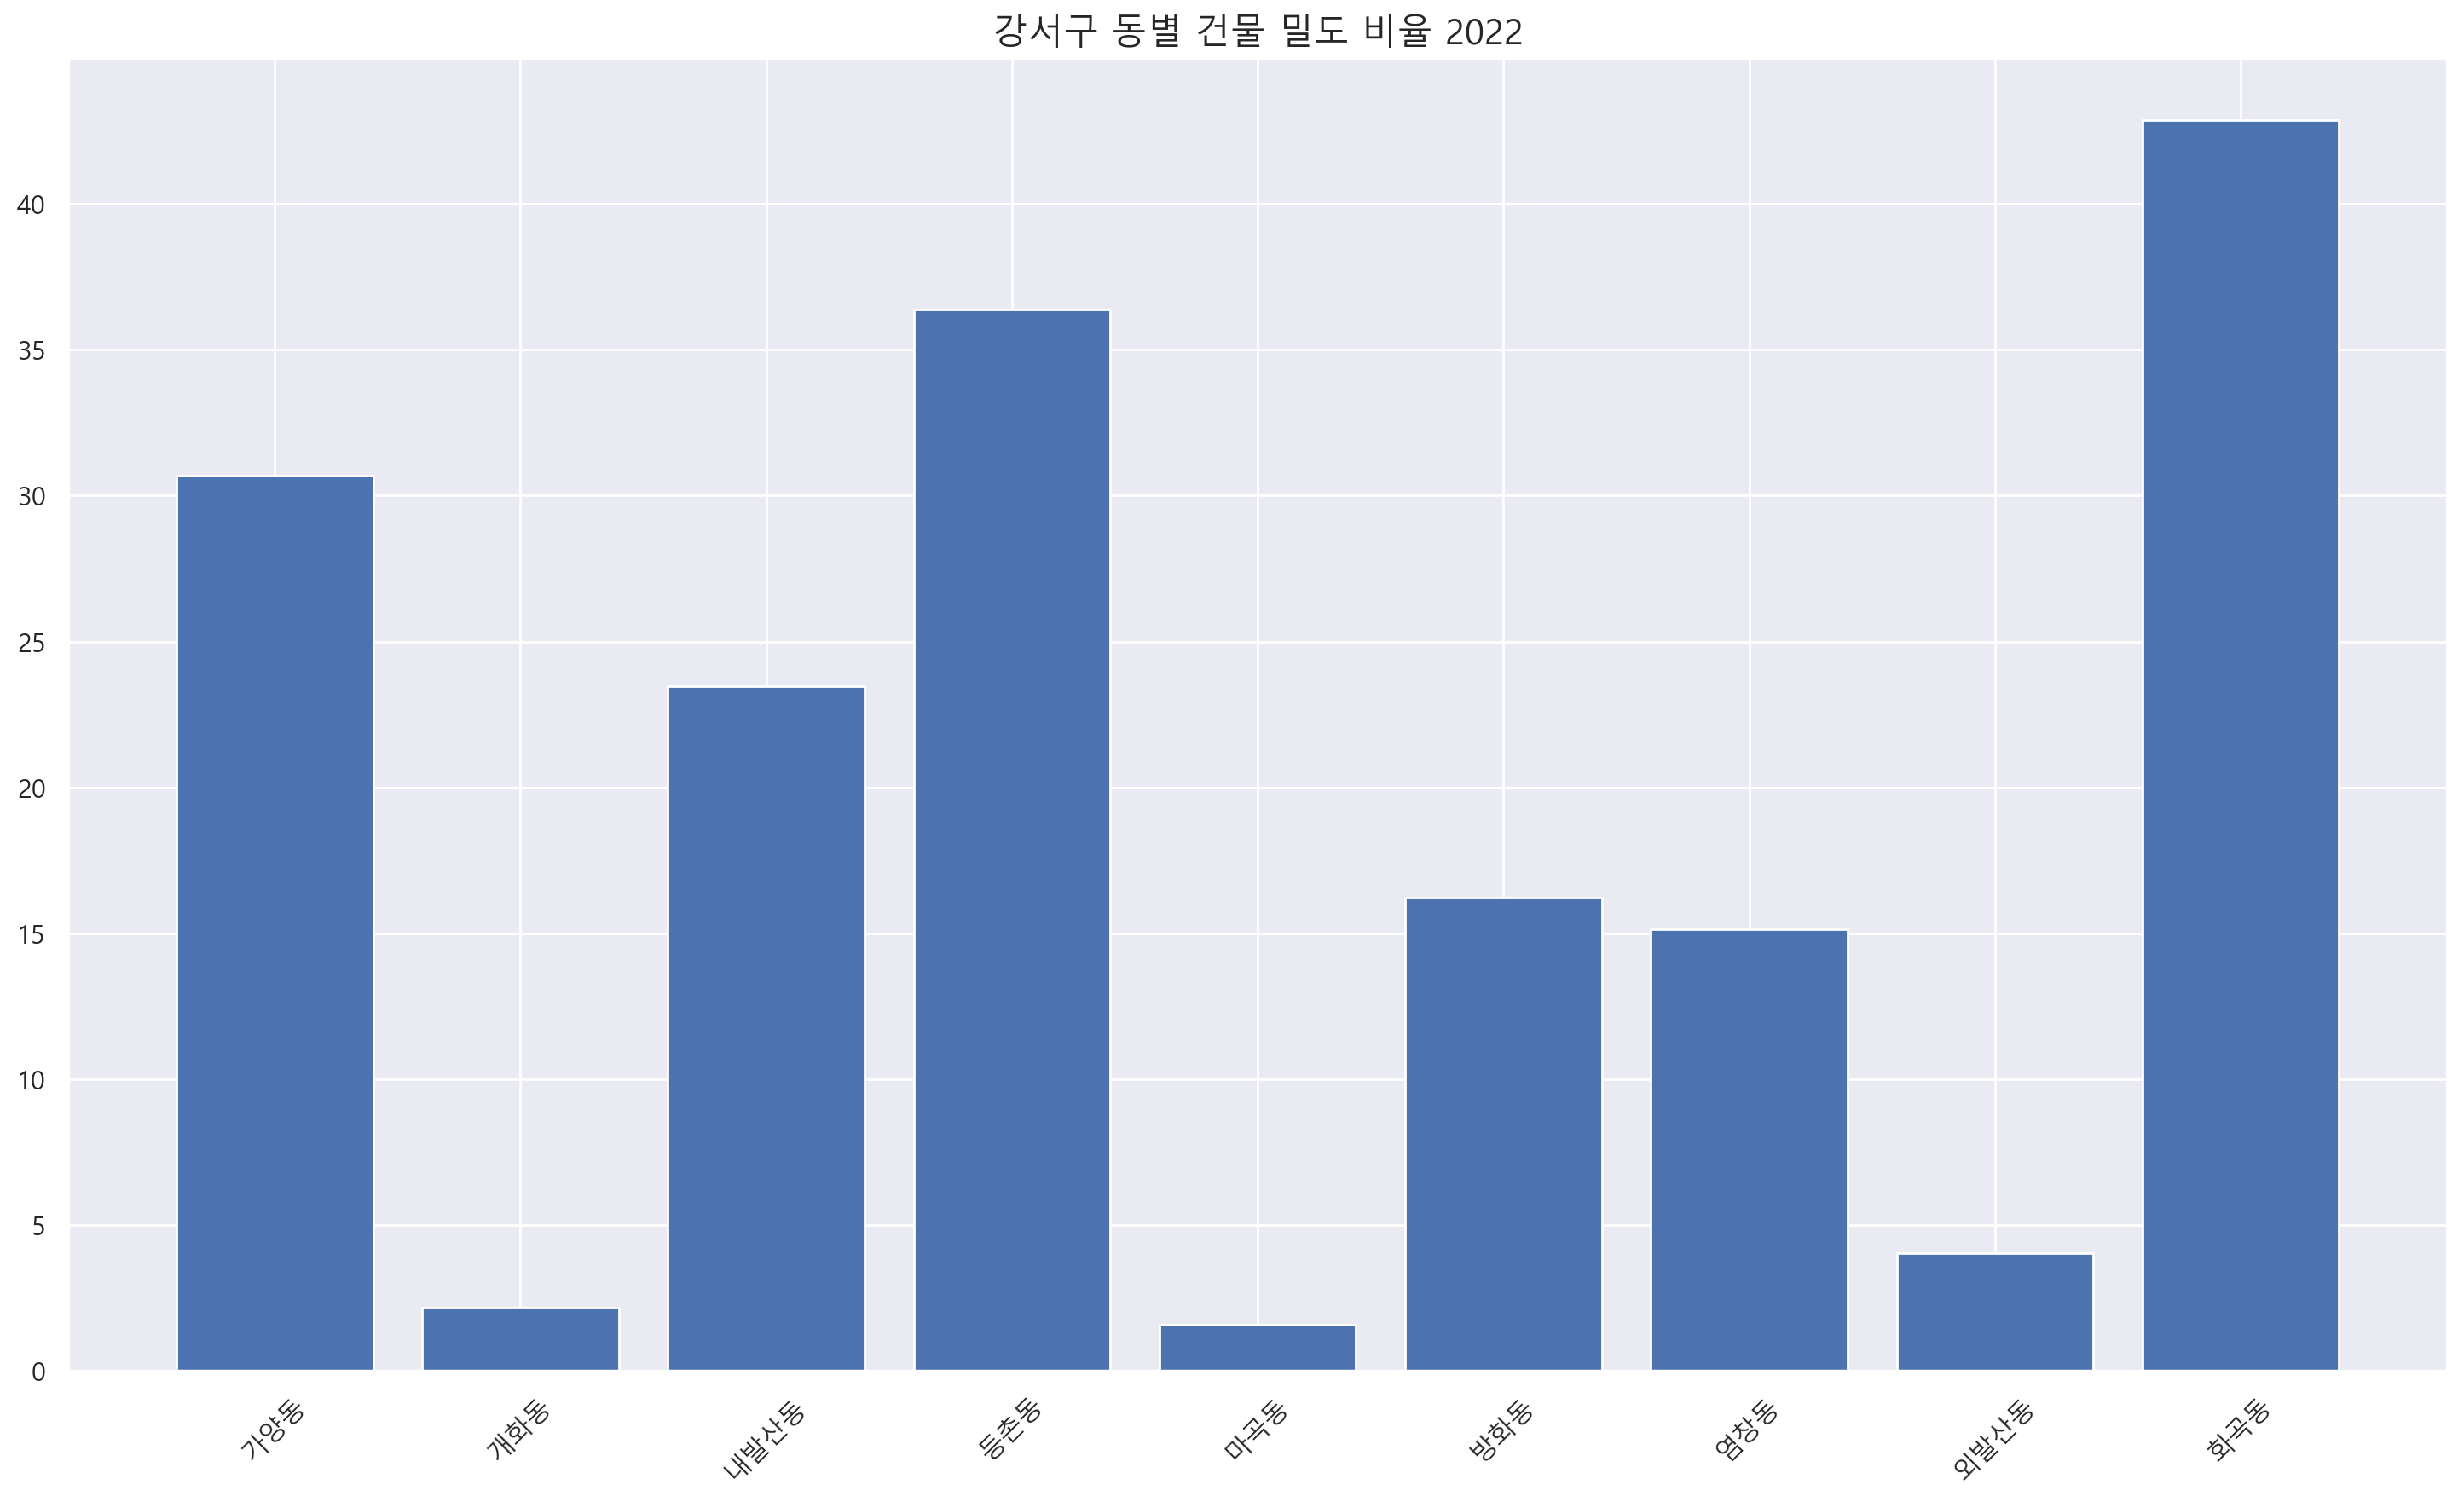

In [326]:
title = f'강서구 동별 건물 밀도 비율 2022'

plt.figure(figsize=figure_size)
plt.bar(merge_df['법정동명'], merge_df['건물면적비율'])
plt.xticks(rotation=45)
plt.title(title, size=title_size)
plt.savefig(f'../../img/건물/동별 건물 밀도 비율/{title}.png')
plt.show()

# 동별 건물 밀도

In [ ]:
tmp_s = gangseo['건물용도명'].value_counts().loc[gangseo['건물용도명'].value_counts() > 200]
tmp_df = pd.DataFrame({'건물용도명':tmp_s.index, '개수': tmp_s.values})
title = '강서구 건물용도 개수 2022'

plt.figure(figsize=figure_size)
plt.bar(tmp_df['건물용도명'], tmp_df['개수'])
plt.xticks(rotation=45)
plt.title(title, size=title_size)
plt.savefig(f'../../img/건물/동별 건물 용도/{title}.png')
plt.show()